In [1]:
library(tidyverse)
options(repr.plot.height=6, repr.plot.width=10)
theme_set(theme_classic())


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# STATS 504 
## Week 3: Solar weather and GOES data

## Space weather
https://www.youtube.com/watch?v=oOXVZo7KikE

## About the data source
- The Geostationary Operational Environmental Satellites (GOES) are a series of satellites in geostationary orbit.
- They collect:
    - [Terrestrial weather data](https://www.star.nesdis.noaa.gov/goes/) (cloud cover, storms, hurricanes, etc.)
    - Atmospheric observations (temperature, humidity, solar radiation)
    - [Space weather data](https://www.swpc.noaa.gov/products/goes-x-ray-flux) (our focus)

# Understanding GOES X-ray Flux Measurements

- There are two GOES measurements:
  - Flux1 (Short Channel): Captures higher-energy X-rays with shorter wavelengths (0.5–4.0 Å). Sensitive to more intense solar events.
  - Flux2 (Long Channel): Captures lower-energy X-rays with longer wavelengths (1.0–8.0 Å). Used to classify solar flares.
- The Flux2 measurement is primarily used for classifying the magnitude of solar flares (e.g., C-class, M-class, X-class) based on the peak flux level.
- The ratio of Flux1 to Flux2 can provide insights into the temperature and emission characteristics of the solar plasma during flare events.

In [2]:
# Loading the data we need
load("goes_2018.RData")

In [3]:
goes_2018%>%print

# A tibble: 30,234,939 × 8
    Year Month   Day  Time Sat          Flux1        Flux2 `__index_level_0__`
   <int> <int> <int> <dbl> <fct>        <dbl>        <dbl>               <int>
 1  2018     1     1 -1.02 go14  0.0000000371 0.0000000118                   0
 2  2018     1     1  1.02 go14  0.0000000371 0.0000000112                   1
 3  2018     1     1  3.07 go14  0.0000000371 0.0000000129                   2
 4  2018     1     1  5.12 go14  0.0000000319 0.0000000135                   3
 5  2018     1     1  7.17 go14  0.0000000294 0.0000000135                   4
 6  2018     1     1  9.22 go14  0.0000000294 0.0000000141                   5
 7  2018     1     1 11.3  go14  0.0000000268 0.0000000135                   6
 8  2018     1     1 13.3  go14  0.0000000294 0.0000000135                   7
 9  2018     1     1 15.4  go14  0.0000000268 0.0000000124                   8
10  2018     1     1 17.4  go14  0.0000000294 0.0000000141                   9
# ℹ 30,234,929 more rows


In [5]:
df %>% head

Year,Month,Day,Time,Sat,Flux1,Flux2,__index_level_0__,t
<int>,<int>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<dttm>
2018,1,1,-1.021,go14,3.7050e-08,1.1784e-08,0,2017-12-31 23:59:58
2018,1,1,1.025,go14,3.7050e-08,1.1205e-08,1,2018-01-01 00:00:01
2018,1,1,3.072,go14,3.7050e-08,1.2940e-08,2,2018-01-01 00:00:03
2018,1,1,5.122,go14,3.1917e-08,1.3519e-08,3,2018-01-01 00:00:05
2018,1,1,7.169,go14,2.9351e-08,1.3519e-08,4,2018-01-01 00:00:07
2018,1,1,9.219,go14,2.9351e-08,1.4097e-08,5,2018-01-01 00:00:09


# (Too) big data
- We can already see that the data are very large and contain a lot of noise. This will make analysis complicated.
- We can effectively deal with both problems by averaging.


## Daily averages
To get a very "high" level picture of the data, we can do the usual thing and summarize by each day:

In [8]:
load("goes_daily.RData")
goes_daily %>% head

,t,sat,flux1_mean,flux2_mean,flux1_logmean,flux2_logmean,flux1_med,flux2_med,flux1_min,flux2_min,flux1_max,flux2_max,flux1_std,flux2_std
,<date>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1980-01-04,go02,1.726347e-06,2.379783e-08,-13.31564,-17.94168,1.479e-06,1.368e-08,1.395e-07,6e-12,4.401e-06,7.313e-07,5.899100e-07,2.936747e-08
1,1980-01-05,go02,1.691449e-06,2.569799e-08,-13.33342,-17.97886,1.551e-06,1.529e-08,4.329e-07,6e-12,9.306e-06,1.419e-06,6.336994e-07,6.407699e-08
2,1980-01-06,go02,3.479739e-06,2.761435e-07,-12.90495,-17.25269,2.092e-06,2.092e-08,1.299e-06,6e-12,9.690e-05,1.246e-04,7.066104e-06,2.040205e-06
3,1980-01-07,go02,3.347606e-06,1.735538e-07,-13.00204,-17.45621,2.056e-06,2.172e-08,8.000e-10,6e-12,1.571e-03,1.806e-04,2.738676e-05,2.725294e-06
4,1980-01-08,go02,4.204871e-06,3.946333e-07,-12.83090,-16.87275,2.309e-06,3.177e-08,7.667e-07,6e-12,1.522e-04,1.578e-04,9.983059e-06,3.123667e-06
5,1980-01-09,go02,2.762496e-06,1.647243e-07,-13.01116,-17.99093,1.984e-06,1.448e-08,1.515e-06,6e-12,7.370e-05,4.405e-05,4.871808e-06,1.285261e-06


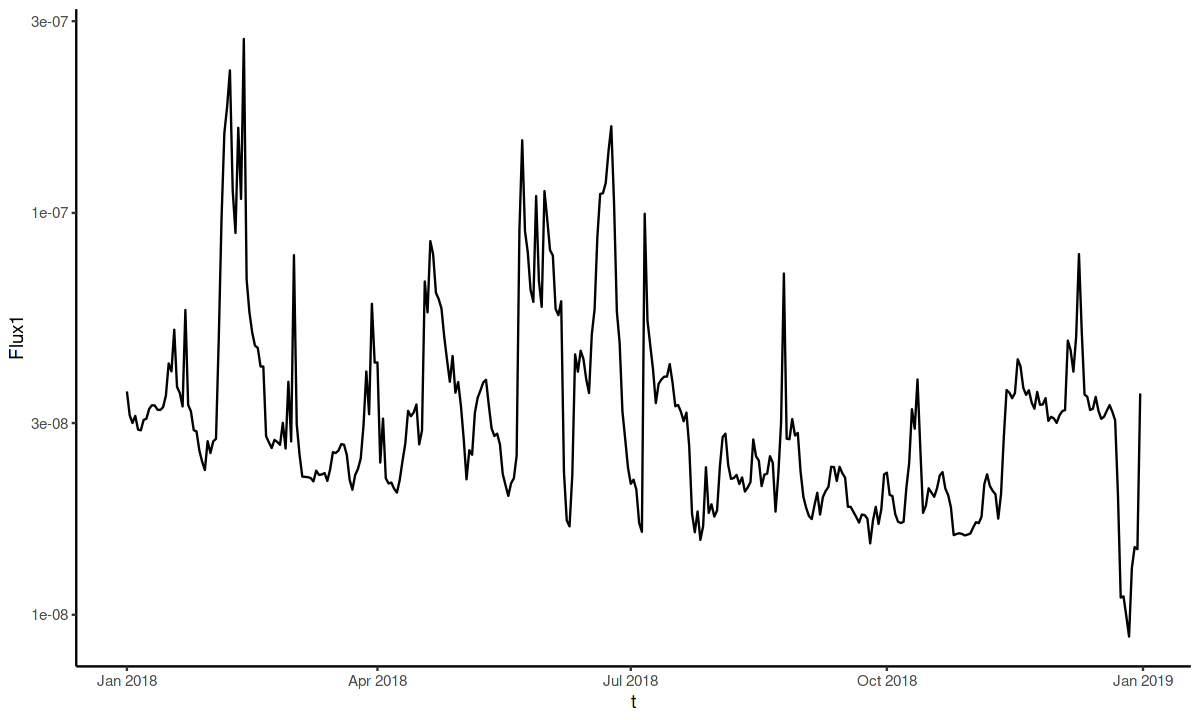

In [7]:
# a summarized view

For the rest of the lecture, we'll work with data summarized by daily average:

# Some key questions
- Outliers?
- Missing data?
- What is the relationship between Flux1 and Flux2 (if any)?

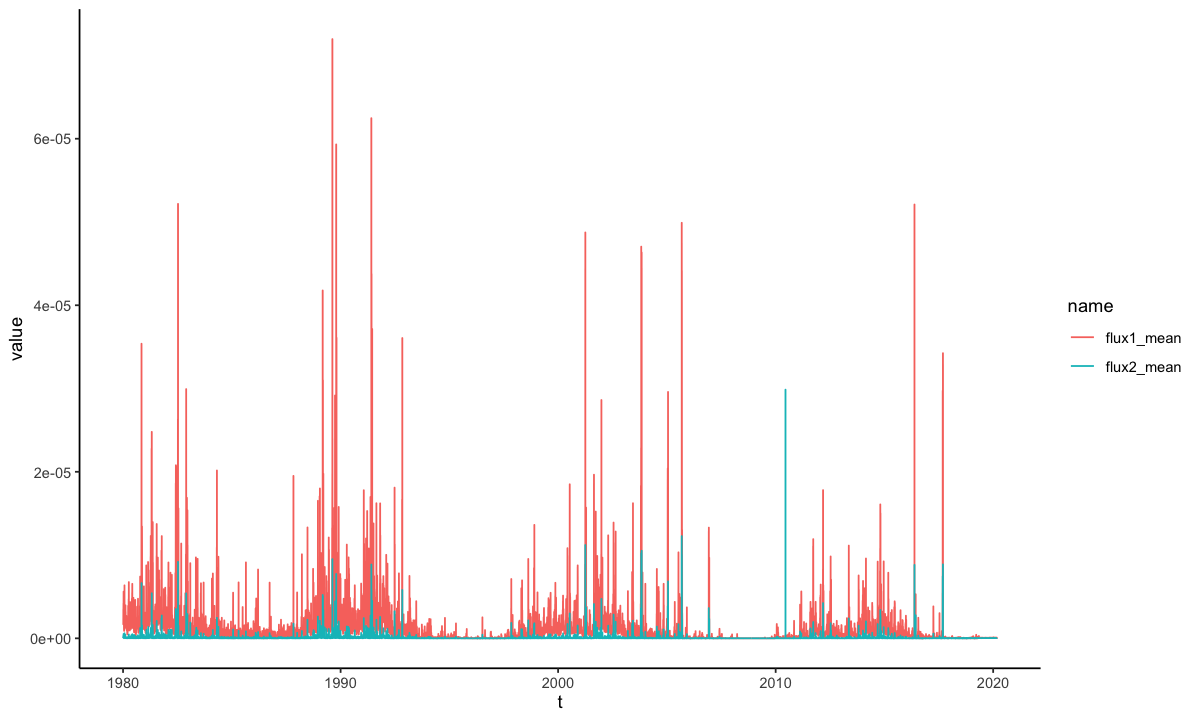

In [10]:
goes_daily %>% 
    filter(pmax(flux1_mean, flux2_mean) < 10) %>% 
    pivot_longer(flux1_mean:flux2_mean) %>% 
    ggplot + 
    geom_line(aes(x = t, y = value, color = name))

## What is the distribution of Flux? 
- What is the marginal distribution of Flux1/Flux2?
- What is their joint distribution?
- Are these distributions constant over time?
- How do `time`, `Sat` and `name` enter into the picture?

## Marginal distributions

## Joint distributions
How are `flux1` and `flux2` jointly distributed?

## Variation over time
Is the distribution of the data constant across time?

## Time series analysis
In this lecture we will do more time series analysis. To make things easier, we'll need rely
on some nice libraries in R:

In [14]:
library(tsibble)
library(feasts)
library(fable)

Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr


Attaching package: ‘tsibble’


The following object is masked from ‘package:lubridate’:

    interval


The following objects are masked from ‘package:base’:

    intersect, setdiff, union


Loading required package: fabletools



First we will convert the dataset to a special kind of tibble that understands time series operations:

In [15]:
library(tsibble)

load('goes_daily_2.RData')

goes_daily_2 %>% 
    filter(pmax(flux1_max, flux2_max) < 1e-3) %>% 
    as_tsibble(index=t, key=sat) %>% 
    ungroup ->
    goes_daily_ts

goes_daily_ts %>% print

# A tsibble: 21,025 x 14 [1D]
# Key:       sat [12]
   t          sat    flux1_mean flux2_mean flux1_logmean flux2_logmean flux1_med
   <date>     <fct>       <dbl>      <dbl>         <dbl>         <dbl>     <dbl>
 1 1980-01-04 go02  0.00000173     2.38e-8         -13.3         -17.9   1.48e-6
 2 1980-01-05 go02  0.00000169     2.57e-8         -13.3         -18.0   1.55e-6
 3 1980-01-06 go02  0.00000348     2.76e-7         -12.9         -17.3   2.09e-6
 4 1980-01-08 go02  0.00000420     3.95e-7         -12.8         -16.9   2.31e-6
 5 1980-01-09 go02  0.00000276     1.65e-7         -13.0         -18.0   1.98e-6
 6 1980-01-10 go02  0.00000561     5.24e-7         -12.5         -16.7   2.67e-6
 7 1980-01-12 go02  0.00000485     2.24e-7         -12.4         -16.2   3.86e-6
 8 1980-01-16 go02  0.00000159     3.89e-8         -13.4         -17.9   1.41e-6
 9 1980-01-17 go02  0.00000112     1.45e-8         -13.7         -18.4   1.11e-6
10 1980-01-18 go02  0.000000949    1.12e-8         -13.9 

## Quiz 🤷  
Sometime in 2012 there was an [X-class solar flare](https://svs.gsfc.nasa.gov/10109/) event. When did it happen?

A. March 7<br/>
B. December 25<br/>
C. October 23<br/>
D. July 6<br/>

### Flux Threshold for X-class Solar Flare:

The classification system is based on the peak flux (in watts per square meter, W/m²).

| Class | Flux Range (W/m²)       |
|-------|--------------------------|
| A     | ≥ 10⁻⁸ and < 10⁻⁷       |
| B     | ≥ 10⁻⁷ and < 10⁻⁶       |
| C     | ≥ 10⁻⁶ and < 10⁻⁵       |
| M     | ≥ 10⁻⁵ and < 10⁻⁴       |
| X     | ≥ 10⁻⁴                  |


## Quiz 🤷  
When was the highest recorded solar output in the last 20 years?

A. September 6, 2017<br/>
B. January 10, 1864<br/>
C. July 27, 1983<br/>
D. September 26, 1982<br/>

## Quiz 🤷
According to the data, what's the probability that yesterday's daily maximum solar output is higher than today's daily maximum?

A. About 1/2<br/>
B. Significantly >1/2 <br/>
C. Significantly <1/2 <br/>

## Quiz 🤷
On average, is the daily median `log10(flux1_med)` increasing or decreasing over the past 45 years? By how much?

A. Decreasing by about .0006 per year.<br/>
B. Increasing by about .001 per year.<br/>
C. No significant change.<br/>

## Decomposing the solar cycle
Can we learn from data that the solar cycle is ~11 years long?

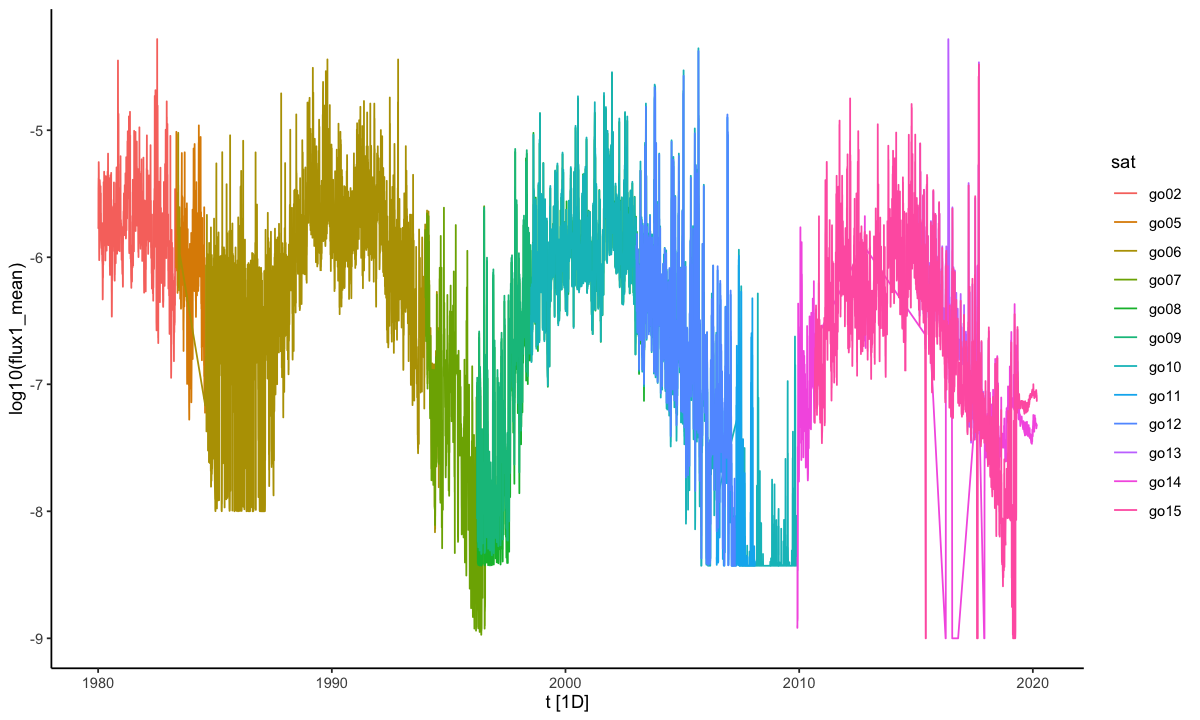

In [17]:
goes_daily_ts %>% ungroup()%>% autoplot(log10(flux1_mean))

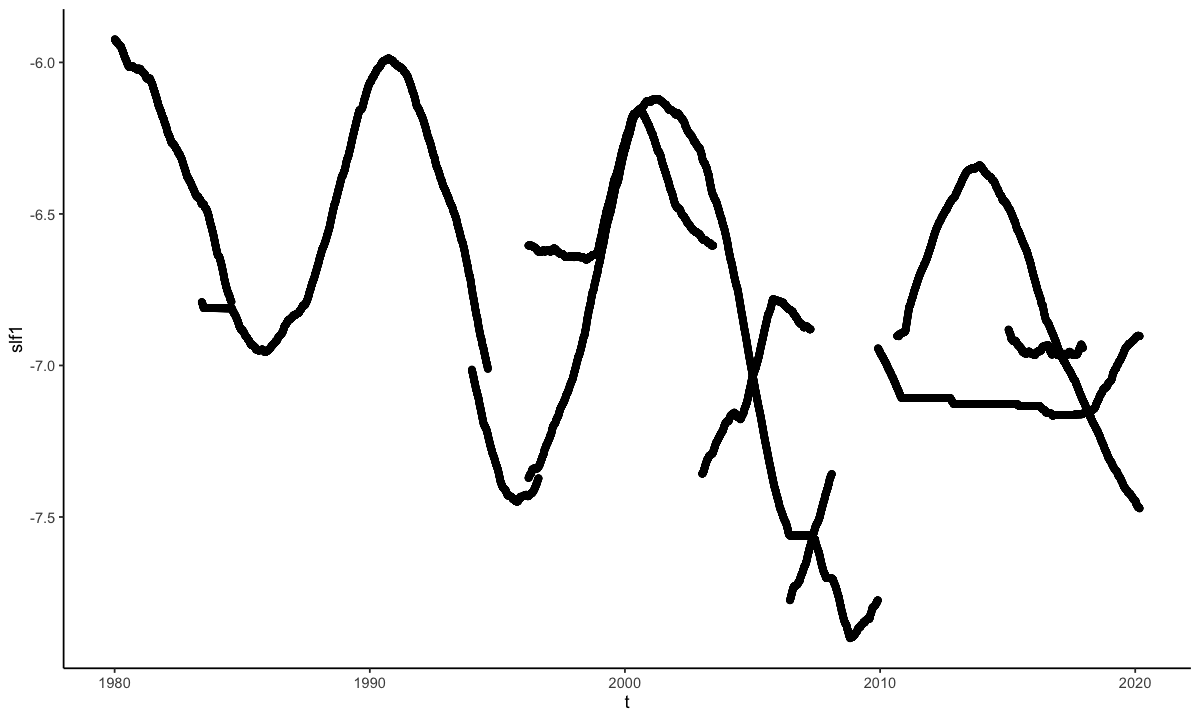

In [21]:
library(slider)

smooth_goes <- function(k) {
    goes_daily_ts %>%
        mutate(slf1 = slide_dbl(log10(flux1_med), \(x) mean(x, na.rm=T), .before=k, .after=k))%>%
    fill_gaps()%>%     mutate(slf1 = imputeTS::na_interpolation(slf1)) 
}

smooth_goes(1000) %>%  ggplot(aes(x = t, y = slf1)) + geom_point()

## Other types of decompositions

There are some well-known decompositions that analysts often apply to time-series data. We'll look at the STL decomposition.

## STL decomposition
STL decomposes the time series into *s*easonal and *t*rend (using a *L*OESS smoother).

## Autocorrelations
An autocorrelation plot shows the amount of correlation between a time series and its lags. It can be used to diagnose whether there are seasonal or trend components, since:
- When data have a trend, the correlations for small lags tend to be large and positive (why?) => AFC will have positive values that slowly decrease with lag length.
- When data are seasonal, the autocorrelations will be larger at multiples of the seasonal period.

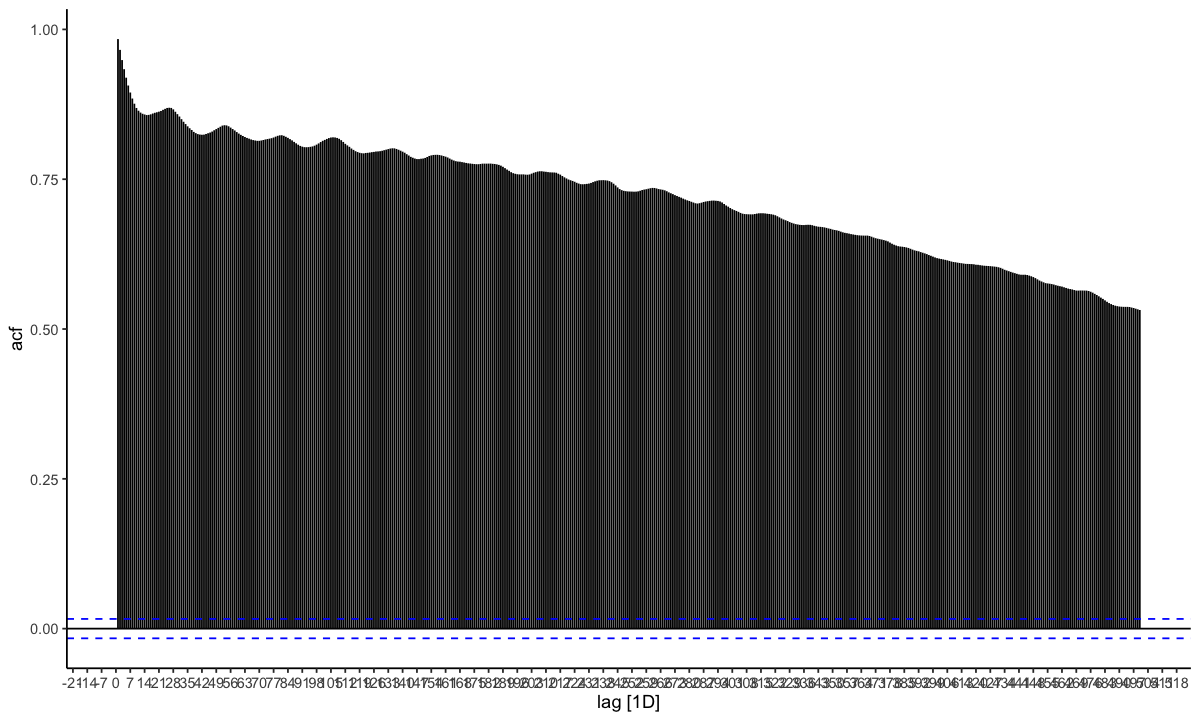

In [24]:
smooth_goes(0) %>%
  fill_gaps() %>%
  as_tibble() %>%
  select(t, slf1) %>%
  group_by(t) %>%
  summarise(slf1 = mean(slf1, na.rm = TRUE), .groups = "drop") %>%
  as_tsibble(index = t) %>%
fill_gaps()%>%     mutate(slf1 = imputeTS::na_interpolation(slf1)) %>%
  ACF(slf1, lag_max = 500) %>%
  autoplot()

# change lag_max

A time series exhibits long range dependence if its autocorrelation function is not absolutely summable. Any time series that we observe in practice is finite and therefore the sample autocorrelation function will always be absolutely summable. Therefore, we need a more indirect way to assess whether a time series has long range dependence. There are many approaches for doing this and it remains an area of active research. Below we illustrate two methods for estimating the Hurst parameter using the GOES data.

## The Hurst coefficient
The [Hurst exponent](https://en.wikipedia.org/wiki/Hurst_exponent) $H$ measures how much "memory" a time series has:

- $H\in[0.5,1]$ indicates a time series with long-term positive autocorrelation: a high value tends to be followed by another high value and that future excursions to more high values do occur. 
- $H\in[0,0.5]$ indicates a time series with long-term switching between high and low values in adjacent pairs, meaning that a single high value will probably be followed by a low value and that the value after that will tend to be high
- A value of $H\approx 0.5$ indicates short-memory, with (absolute) autocorrelations decaying exponentially quickly to zero.

As a check, estimate the Hurst parameter for IID normal data (the true value of the Hurst parameter here is 1/2).



As another check, simulate correlated data with short-range dependence (the true value of the Hurst parameter is stil 1/2).



A basic fact from elementary statistics is that the variance of the sample mean of $m$ iid observations is $\sigma^2/m$, where $\sigma^2$ is the variance of one observation.  If instead of iid data we have short range dependent stationary data, the variance of the sample mean of $m$ consecutive values is $k/m$, for a constant $k$ that depends on the autocovariances.  However if the data are long-range dependent, the variance of $m$ consecutive values has the form $km^{2(H-1)}$.  This gives rise to a means for estimating $H$ -- we can partition the observed series into blocks of size $m$, take the sample mean of each block, then take the variance of these sample means.  We can then do this for various values of $m$ and view the log variance in relation to the logarithm of the block size $m$.

In [29]:
goes_daily_ts %>%
  as_tibble() %>%
  group_by(sat) %>%
  summarise(
    hurst = list(hurstexp(na.omit(log(flux1_mean)))),
    .groups = "drop"
  ) %>%
  mutate(H = map_dbl(hurst, ~ .x$Hs))  %>% print

Simple R/S Hurst estimation:         0.7366255 
Corrected R over S Hurst exponent:   0.7917108 
Empirical Hurst exponent:            0.7108507 
Corrected empirical Hurst exponent:  0.6869288 
Theoretical Hurst exponent:          0.5392627 
Simple R/S Hurst estimation:         0.7399431 
Corrected R over S Hurst exponent:   0.9406971 
Empirical Hurst exponent:            1.225867 
Corrected empirical Hurst exponent:  1.18417 
Theoretical Hurst exponent:          0.5455709 
Simple R/S Hurst estimation:         0.8725993 
Corrected R over S Hurst exponent:   1.006263 
Empirical Hurst exponent:            0.9899149 
Corrected empirical Hurst exponent:  0.9690952 
Theoretical Hurst exponent:          0.5312966 
Simple R/S Hurst estimation:         0.830261 
Corrected R over S Hurst exponent:   0.9452299 
Empirical Hurst exponent:            0.910572 
Corrected empirical Hurst exponent:  0.8844282 
Theoretical Hurst exponent:          0.5397388 
Simple R/S Hurst estimation:         0.8709479

## Predicting solar flares

Can we predict the occurrence of solar flares using these data? Recall how we classify different solar flares:

https://en.wikipedia.org/wiki/Solar_flare#Classification

In [30]:
# goes_daily_ts %>% 
#     select(t, flux1_max, flux2_max) %>% 
goes_daily_ts <- mutate(
    goes_daily_ts,
    flare = cut(log10(goes_daily_ts$flux2_max), c(-Inf, -7:-4, Inf), 
    labels = c("A", "B", "C", "M", "X")))

goes_daily_ts %>% mutate(X_tomorrow = lead(flare) == "X") -> data
print(data)

# A tsibble: 21,025 x 16 [1D]
# Key:       sat [12]
   t          sat    flux1_mean flux2_mean flux1_logmean flux2_logmean flux1_med
   <date>     <fct>       <dbl>      <dbl>         <dbl>         <dbl>     <dbl>
 1 1980-01-04 go02  0.00000173     2.38e-8         -13.3         -17.9   1.48e-6
 2 1980-01-05 go02  0.00000169     2.57e-8         -13.3         -18.0   1.55e-6
 3 1980-01-06 go02  0.00000348     2.76e-7         -12.9         -17.3   2.09e-6
 4 1980-01-08 go02  0.00000420     3.95e-7         -12.8         -16.9   2.31e-6
 5 1980-01-09 go02  0.00000276     1.65e-7         -13.0         -18.0   1.98e-6
 6 1980-01-10 go02  0.00000561     5.24e-7         -12.5         -16.7   2.67e-6
 7 1980-01-12 go02  0.00000485     2.24e-7         -12.4         -16.2   3.86e-6
 8 1980-01-16 go02  0.00000159     3.89e-8         -13.4         -17.9   1.41e-6
 9 1980-01-17 go02  0.00000112     1.45e-8         -13.7         -18.4   1.11e-6
10 1980-01-18 go02  0.000000949    1.12e-8         -13.9 

# GOES autoregression modeling

[Autoregressive models](https://en.wikipedia.org/wiki/Autoregressive_model) are one of the most common forms of time series model.  The most familiar autoregressive (AR) model is a linear autoregressive model, but there are many forms of non-linear autoregressive model and this area remains highly active in terms of research.

Here we use linear autoregressive models to assess the information in past flux measurements for predicting the current flux measurement.  We incorporate a gap between the past measurements, 'x' and the present measurement 'y'. This analysis provides insight into how the information in the past about the present is best summarized and represented.

Since linear AR models naturally exhibit multicollinearity (due to autocorrelation), we use [ridge regression](https://en.wikipedia.org/wiki/Ridge_regression) here to fit the models.

In [43]:
create_lags <- function(data, var = "flux2_max", lags = 10) {
  for (i in 1:lags) {
    data[[paste0("lag_", i)]] <- dplyr::lag(data[[var]], i)
  }
  data %>% tidyr::drop_na()
}


In [55]:
library(glmnet)
# Make sure your data is sorted by time
data_lagged <- goes_daily_ts %>%
  arrange(t) %>%
  select(t, flux2_max) %>%
  create_lags(var = "flux2_max", lags = 10)  # You can adjust lag count

# Prepare matrix for glmnet
X <- as.matrix(data_lagged %>% select(starts_with("lag_")))
X <- X[,1:10]
y <- data_lagged$flux2_max


In [56]:
head(X)

lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
1.208000e-05,9.312000e-06,1.081000e-04,9.819000e-06,1.605000e-05,4.405000e-05,1.578000e-04,1.246000e-04,1.419000e-06,7.313000e-07
4.190000e-07,1.208000e-05,9.312000e-06,1.081000e-04,9.819000e-06,1.605000e-05,4.405000e-05,1.578000e-04,1.246000e-04,1.419000e-06
7.970000e-05,4.190000e-07,1.208000e-05,9.312000e-06,1.081000e-04,9.819000e-06,1.605000e-05,4.405000e-05,1.578000e-04,1.246000e-04
1.707000e-05,7.970000e-05,4.190000e-07,1.208000e-05,9.312000e-06,1.081000e-04,9.819000e-06,1.605000e-05,4.405000e-05,1.578000e-04
5.687000e-05,1.707000e-05,7.970000e-05,4.190000e-07,1.208000e-05,9.312000e-06,1.081000e-04,9.819000e-06,1.605000e-05,4.405000e-05
1.535000e-05,5.687000e-05,1.707000e-05,7.970000e-05,4.190000e-07,1.208000e-05,9.312000e-06,1.081000e-04,9.819000e-06,1.605000e-05


## Class Exercise

There are a number of interesting questions that can be addressed with the GOES X-ray flux data. Here are a few examples:

- What is the temporal correlation structure of the flux levels?

- Are there extreme events in the flux levels, and if so how are they distributed in time?

- Are there periodicities in the flux levels?

- What is the shape of the marginal flux distribution, and what can be said about the right tail of the flux distribution (corresponding to the largest flux levels)?

- Can we predict flux levels in the near future from current flux levels?

- How do flux levels correlate with different phases of the solar cycle (rising phase, maximum, declining phase, minimum)? Can we observe patterns or anomalies in flux levels that align with the solar cycle?

- How do solar events such as coronal mass ejections (CMEs) impact X-ray flux levels?

## Question  

Are there extreme events in the flux levels, and if so how are they distributed in time?


## Question  

How do flux levels correlate with different phases of the solar cycle (rising phase, maximum, declining phase, minimum)? Can we observe patterns or anomalies in flux levels that align with the solar cycle?


The solar cycle is ~11 years long and consists of:

Solar Minimum – Few sunspots, low activity

Rising Phase – Activity increases

Solar Maximum – Most sunspots, frequent flares/CMEs

Declining Phase – Activity decreases


In [98]:

# Define function to assign phase based on timestamp
get_phase_21_23 <- function(date) {

    if (date >= ymd("1986-09-01") & date < ymd("1988-09-01")) {
    return("Cycle 22 Rising")
  } else if (date >= ymd("1988-09-01") & date < ymd("1991-07-01")) {
    return("Cycle 22 Maximum")
  } else if (date >= ymd("1991-07-01") & date < ymd("1996-05-01")) {
    return("Cycle 22 Declining")
  }
  
    
  # Outside defined phases (e.g. minima between cycles)
  else {
    return("Minimum")
  }
}

# Add phase column
datatmp <- goes_daily %>% filter(t>= ymd("1986-09-01") & t< ymd("1996-05-01")) %>%
  mutate(phase = map_chr(t, get_phase_21_23))
